Plot sSFR vs something. sSFR = MASS / SFR

# Imports

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from scipy.optimize import curve_fit

rc = {"font.family" : "serif",
      "mathtext.fontset" : "cm"}
plt.rcParams.update(rc)
plt.rcParams["font.serif"] = ["Times New Roman"] + plt.rcParams["font.serif"]

In [21]:
hdf5_path = "UltraDeep_Population_Profile.h5"
with pd.HDFStore(hdf5_path, mode='r') as store:
    profile_table = store.get("PopulationProfile")  # Load the DataFrame from the HDF5 file
    print(f"""===== Loaded Table from HDF5 =====
>>> The table has been successfully loaded from '{hdf5_path}' with the key 'PopulationProfile'.""") 
    
    absorption_table = store.get("AbsorptionLineDetection")
    print(f"""===== Loaded Absorption Line Detection Table from HDF5 =====
>>> The table has been successfully loaded from '{hdf5_path}' with the key 'AbsorptionLineDetection'.""")

    v50_table = store.get("Absorption_V50_Table")
    print(f"""===== Loaded v50 Table from HDF5 =====
>>> The v50 table has been successfully loaded from '{hdf5_path}' with the key 'Absorption_V50_Table'.""")

zflag = profile_table['ZFLAGS'].values
goodz = zflag == 4

log_stellar_mass = profile_table["STELLAR_MASS"].values # This is in log scale
redshift = profile_table['Z'].values
fits_num = profile_table['NUM'].values
magI = profile_table['MAGI'].values
sfr = profile_table["SFR"].values

log_stellar_mass = log_stellar_mass[goodz]
redshift = redshift[goodz]
fits_num = fits_num[goodz]
magI = magI[goodz]
sfr = sfr[goodz]

===== Loaded Table from HDF5 =====
>>> The table has been successfully loaded from 'UltraDeep_Population_Profile.h5' with the key 'PopulationProfile'.
===== Loaded Absorption Line Detection Table from HDF5 =====
>>> The table has been successfully loaded from 'UltraDeep_Population_Profile.h5' with the key 'AbsorptionLineDetection'.
===== Loaded v50 Table from HDF5 =====
>>> The v50 table has been successfully loaded from 'UltraDeep_Population_Profile.h5' with the key 'Absorption_V50_Table'.


# Plotting graphs

## Specific Star Formation Rate (sSFR)

C:\Users\User\AppData\Local\Temp\ipykernel_5036\2739810025.py:2: RuntimeWarning: invalid value encountered in log10
  log_ssfr = np.log10(ssfr)


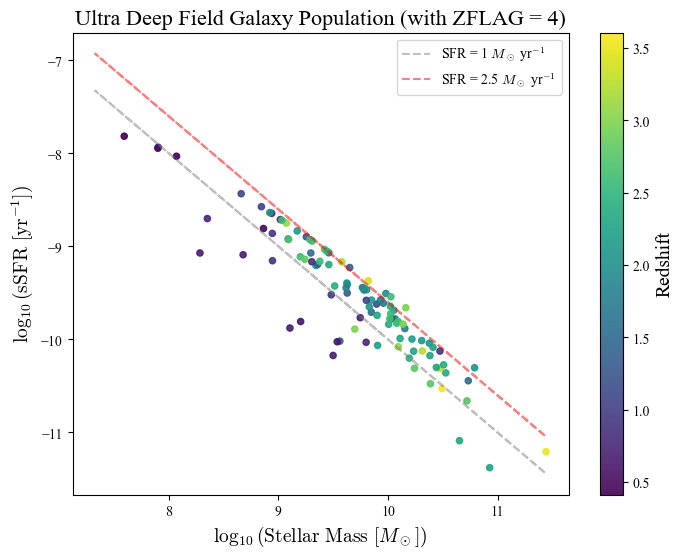

In [88]:
ssfr = sfr / (10**log_stellar_mass)
log_ssfr = np.log10(ssfr)

constant_sfr1 = 1 / (10**log_stellar_mass)
constant_sfr25 = 2.5 / (10**log_stellar_mass)

fig, ax = plt.subplots(figsize=(8,6))

scatter = ax.scatter(log_stellar_mass, log_ssfr, c = redshift, s=20, alpha=0.9, cmap='viridis')
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label(r"Redshift", fontsize=14)

ax.plot(log_stellar_mass, np.log10(constant_sfr1), color='grey', linestyle='--', alpha = 0.5, label = r"SFR = 1 $M_\odot$ yr$^{-1}$")
ax.plot(log_stellar_mass, np.log10(constant_sfr25), color='red', linestyle='--', alpha = 0.5, label = r"SFR = 2.5 $M_\odot$ yr$^{-1}$")

ax.set_xlabel(r"$\log_{10}(\mathrm{Stellar\ Mass}\ [M_\odot])$", fontsize = 14)
ax.set_ylabel(r"$\log_{10}(\mathrm{sSFR}\ [\mathrm{yr}^{-1}])$", fontsize = 14)
ax.set_title("Ultra Deep Field Galaxy Population (with ZFLAG = 4)", fontsize = 16)
ax.legend()

## v50 correlations

In [29]:
v50_table

,NUM,C II λ1334,O III λ1666,C II λ2326,Fe II λ2344,Fe II λ2374,Ne IV λ2440,Fe II λ2586,Fe II λ2600,Mg II λ2799
0,910161060,2481.932745,-43.843288,NaN,-413.501362,536.563822,NaN,525.001427,-1092.092585,-511.833830
1,910166908,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,910167444,1197.190109,530.574111,-168.393976,-31.857916,NaN,NaN,NaN,NaN,NaN
3,910170531,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,910170571,NaN,NaN,NaN,NaN,426.719069,NaN,260.665260,55.154028,NaN
...,...,...,...,...,...,...,...,...,...,...
144,910376825,-605.609746,437.757986,NaN,-479.409238,39.593217,-504.763695,-926.180619,55.150986,NaN
145,910378108,NaN,NaN,NaN,600.886488,576.439525,-276.508260,NaN,-45.055786,-663.492378
146,910378821,NaN,NaN,NaN,NaN,654.755599,NaN,445.857186,425.827269,NaN
147,910379064,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2746.280165,NaN


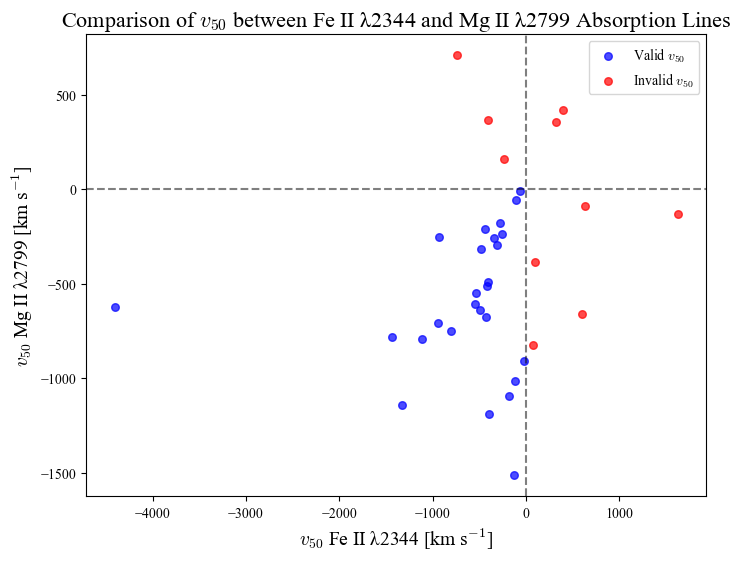

In [90]:
line_names = v50_table.columns.tolist()[1:]  # Exclude the first column which is 'FITS_NUM'
linename_x = line_names[3]
linename_y = line_names[8]

v50_x = v50_table[linename_x].values
v50_y = v50_table[linename_y].values

rule_out = (v50_x > 0) | (v50_y > 0)

fig, ax = plt.subplots(figsize=(8,6))

ax.scatter(v50_x[~rule_out], v50_y[~rule_out], c='blue', s=30, alpha=0.7, label = r"Valid $v_{50}$")
ax.scatter(v50_x[rule_out], v50_y[rule_out], c='red', s=30, alpha=0.7, label = r"Invalid $v_{50}$")

ax.axvline(x=0, color='black', linestyle='--', alpha=0.5)
ax.axhline(y=0, color='black', linestyle='--', alpha=0.5)

ax.set_xlabel(f"$v_{{50}}$ {linename_x} [km s$^{{-1}}$]", fontsize=14)
ax.set_ylabel(f"$v_{{50}}$ {linename_y} [km s$^{{-1}}$]", fontsize=14)
ax.set_title(f"Comparison of $v_{{50}}$ between {linename_x} and {linename_y} Absorption Lines", fontsize=16)

ax.legend()
plt.savefig("v50_comparison.png", dpi=300)

In [81]:
profile_table.columns.tolist()

['NUM',
 'ID-IAU',
 'ALPHA',
 'DELTA',
 'MAGI',
 'Z',
 'ZFLAGS',
 'MAG_U_CFH12K',
 'MAGERR_AUTO_U',
 'MAG_B_CFH12K',
 'MAGERR_AUTO_B',
 'MAG_V_CFH12K',
 'MAGERR_AUTO_V',
 'MAG_R_CFH12K',
 'MAGERR_AUTO_R',
 'MAG_I_CFHTLS_T0003',
 'MAGERR_AUTO_I_t0003',
 'MAG_U_CFHTLS',
 'MAGERR_AUTO_U.1',
 'MAG_G_CFHTLS',
 'MAGERR_AUTO_G',
 'MAG_R_CFHTLS',
 'MAGERR_AUTO_R.1',
 'MAG_I_CFHTLS',
 'MAGERR_AUTO_I',
 'MAG_Z_CFHTLS',
 'MAGERR_AUTO_Z',
 'MAG_AUTO_U_CORR',
 'MAG_AUTO_ULOIANO',
 'MAGERR_AUTO_ULOIANO',
 'MAG_AUTO_B_CORR',
 'MAG_AUTO_V_CORR',
 'MAG_AUTO_R_CORR',
 'MAG_AUTO_I_CORR',
 'MAG1_APER_U',
 'MAG1ERR_APER_U',
 'MAG2_APER_U',
 'MAG2ERR_APER_U',
 'MAG1_APER_ULOIANO',
 'MAG1ERR_APER_ULOIANO',
 'MAG2_APER_ULOIANO',
 'MAG2ERR_APER_ULOIANO',
 'ISOAREA_IMAGE_U',
 'THRESHOLD_U',
 'MU_THRESHOLD_U',
 'BACKGROUND_U',
 'FLUX_MAX_U',
 'MU_MAX_U',
 'KRON_RADIUS_U',
 'FLUX1_RADIUS_U',
 'FLUX2_RADIUS_U',
 'FLUX3_RADIUS_U',
 'MAG_ISO_U',
 'MAGERR_ISO_U',
 'FLUX_ISO_U',
 'FLUXERR_ISO_U',
 'MAG_ISOCOR_U',
 'MA

### Notes on invalid datapoints

The reason that there are datapoints with $v_{50} > 0\;\mathrm{km/s}$ is because sometimes a galaxy have very faint absorption features and thus when we tried to force-compute $v_{50}$ we get invalid result: the actual absorption feature might be to the right of the forced-detection. 

Let's say, we have a spectrum we want to analyze. In this spectrum, our algorithm **detect only Mg II**, other lines are very *faint* in the sense that it doesn't pass the threshold. Thus, when we try to compute the $v_{50}$ of said line, it is bound to high uncertainty. It's practically useless to use these undetected line to calculate $v_{50}$. 